In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_trafic = pd.read_csv("../CSVs/Open_Data_Website_Traffic.csv")
df_trafic.head()

,Date,Socrata Users,Socrata Sessions,Socrata Bounce Rate,Geohub Users,Geohub Sessions,Geohub Bounce Rate,Combined Users
0,08/07/2017,386,439,13.44,193.0,214.0,30.37,579.0
1,04/21/2017,354,422,16.11,115.0,133.0,39.85,469.0
2,02/26/2018,634,706,21.10,321.0,353.0,28.90,955.0
3,06/26/2016,136,148,0.00,44.0,54.0,51.85,180.0
4,06/28/2017,367,417,18.70,232.0,253.0,36.36,599.0


In [5]:
df_trafic['date_column'] = df_trafic.Date.astype("string")
df_trafic['year'] = df_trafic['date_column'].str[-4:]
df_trafic.year.fillna("0",  inplace=True)
df_trafic.drop(['date_column'], axis=1, inplace=True)
df_trafic.fillna(0, inplace=True)
df_trafic.tail()

,Date,Socrata Users,Socrata Sessions,Socrata Bounce Rate,Geohub Users,Geohub Sessions,Geohub Bounce Rate,Combined Users,year
1568,06/21/2018,552,603,31.01,256.0,276.0,25.00,808.0,2018
1569,06/22/2018,466,517,32.69,205.0,234.0,26.50,671.0,2018
1570,06/23/2018,182,209,34.93,87.0,103.0,24.27,269.0,2018
1571,06/24/2018,215,231,38.96,125.0,133.0,16.54,340.0,2018
1572,06/25/2018,670,772,30.96,271.0,306.0,23.86,941.0,2018


# Line chart

In [6]:
df_trafic_mean_by_year= pd.DataFrame()

def make_mean(col, group):
    df_trafic_mean_by_year[col] = df_trafic.groupby(group)[col].mean()

In [7]:
cols = df_trafic.iloc[:, 1:-1].columns

for c in cols:
    make_mean(c, 'year')
    
#df_trafic_mean_by_year.head()

<Axes: xlabel='year'>

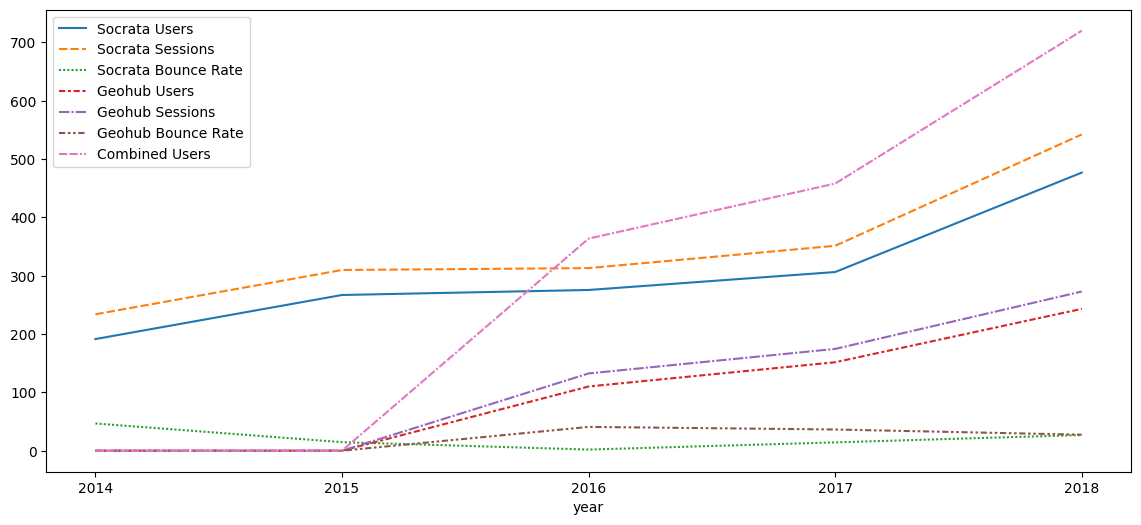

In [8]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_trafic_mean_by_year)

# Bar chart

<Axes: ylabel='Socrata Users'>

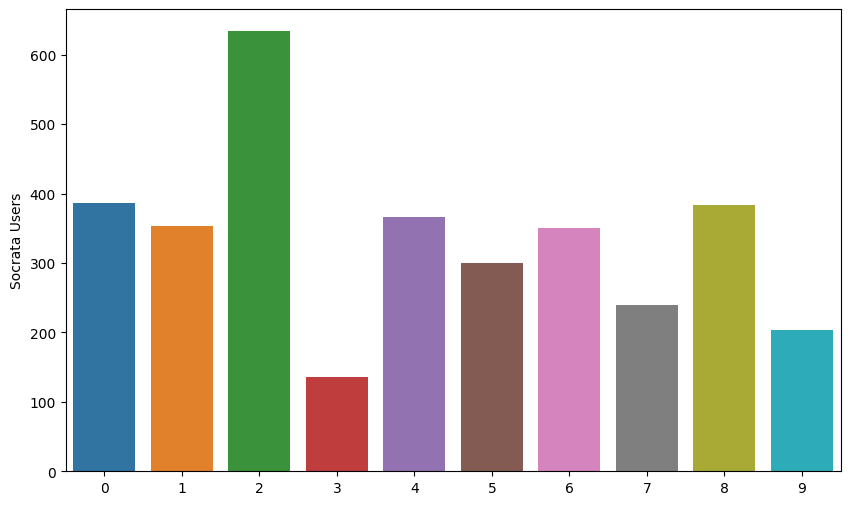

In [9]:
# df_trafic_mean_by_year.index = pd.to_numeric(df_trafic_mean_by_year.index,  errors='coerce')
# df_trafic_mean_by_year.head()

firsts_trafic = df_trafic.head(10)

plt.figure(figsize=(10,6))

sns.barplot(x=firsts_trafic.index, y=firsts_trafic['Socrata Users'])


# Heatmap

In [11]:
ign_data = pd.read_csv("../CSVs/ign_scores.csv", index_col="Platform")

<Axes: ylabel='Platform'>

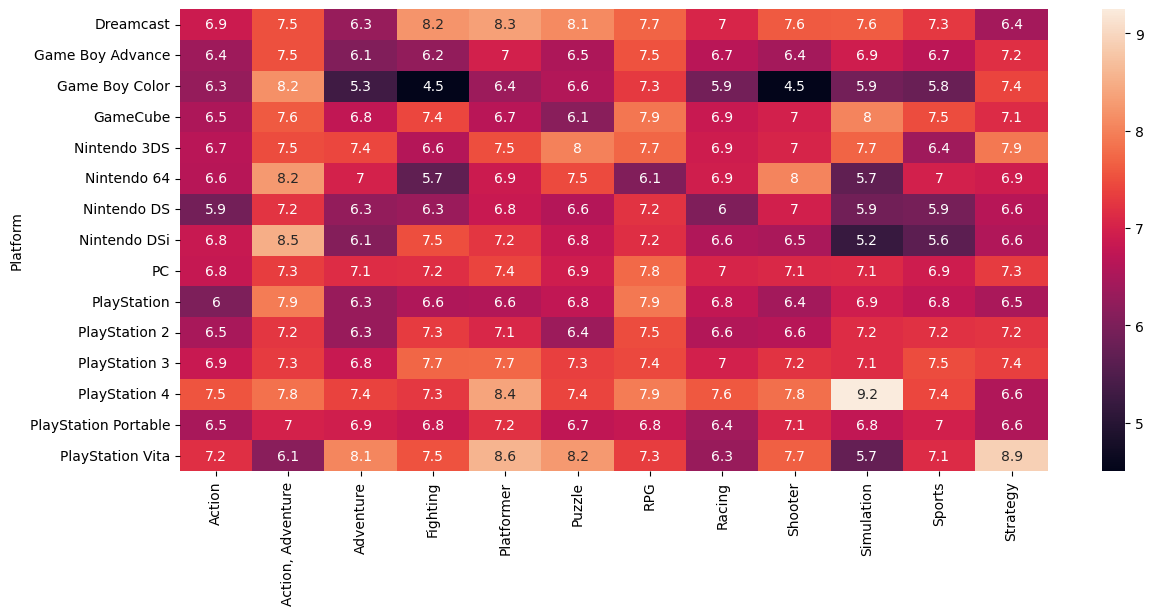

In [30]:
# columns_list = ['Socrata Users', 'Socrata Sessions', 'Socrata Bounce Rate', 'Geohub Users', 'Geohub Sessions', 'Geohub Bounce Rate','Combined Users']
# heat_meat_int = df_trafic_mean_by_year[list(columns_list)].astype(int)

plt.figure(figsize=(14,6))

sns.heatmap(data=ign_data.head(15), annot=True)

# Scatter Plots

In [10]:
df_insurance = pd.read_csv('../CSVs/insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

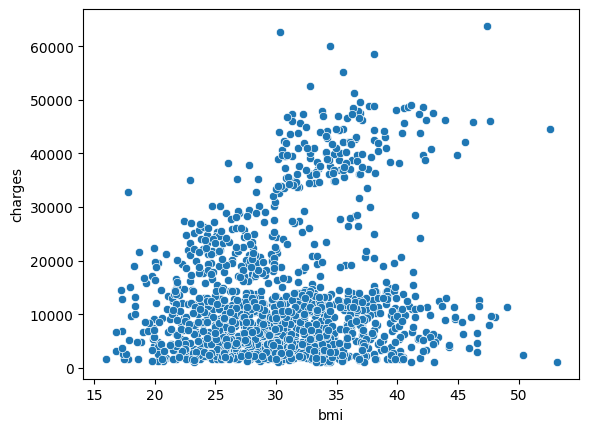

In [11]:
# scatter plot
sns.scatterplot(x=df_insurance['bmi'], y=df_insurance['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

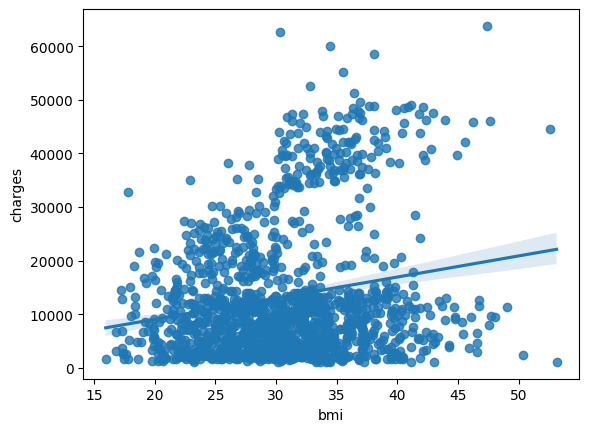

In [12]:
# Regresion line
sns.regplot(x=df_insurance['bmi'], y=df_insurance['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

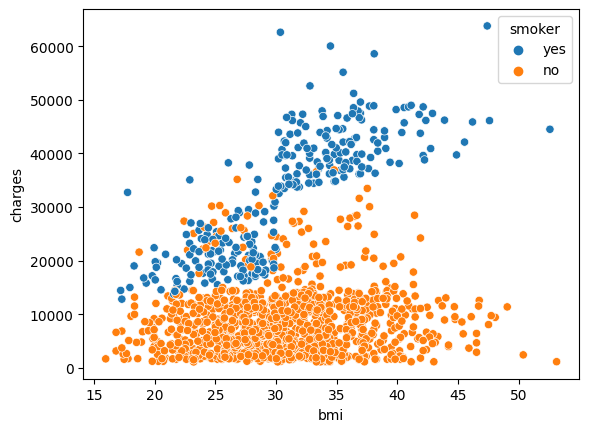

In [14]:
# scatter plot with hue relations
sns.scatterplot(x=df_insurance['bmi'], y=df_insurance['charges'], hue=df_insurance['smoker'])

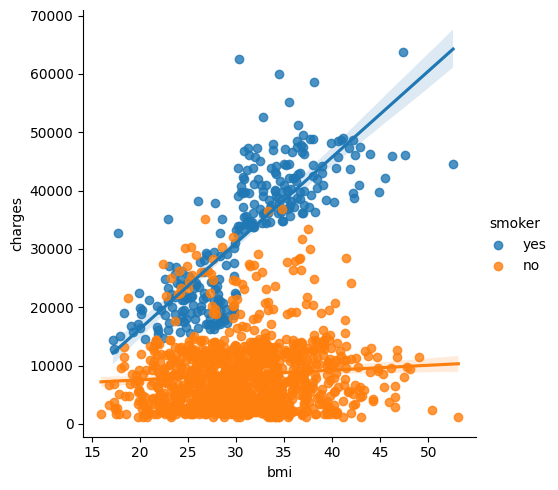

In [15]:
# Multiple regression lines
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df_insurance)

C:\Users\pfs\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

C:\Users\pfs\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


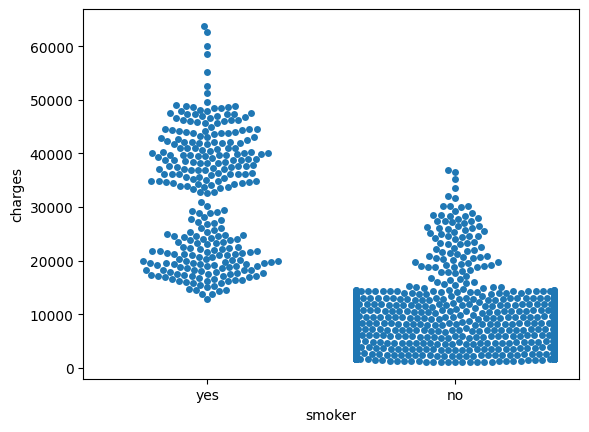

In [16]:
# categorical scatter plot
sns.swarmplot(x=df_insurance['smoker'], y=df_insurance['charges'])

# Histograms

In [17]:
df_iris = pd.read_csv("../CSVs/iris.csv",  index_col="Id")

<Axes: xlabel='Petal Length (cm)', ylabel='Count'>

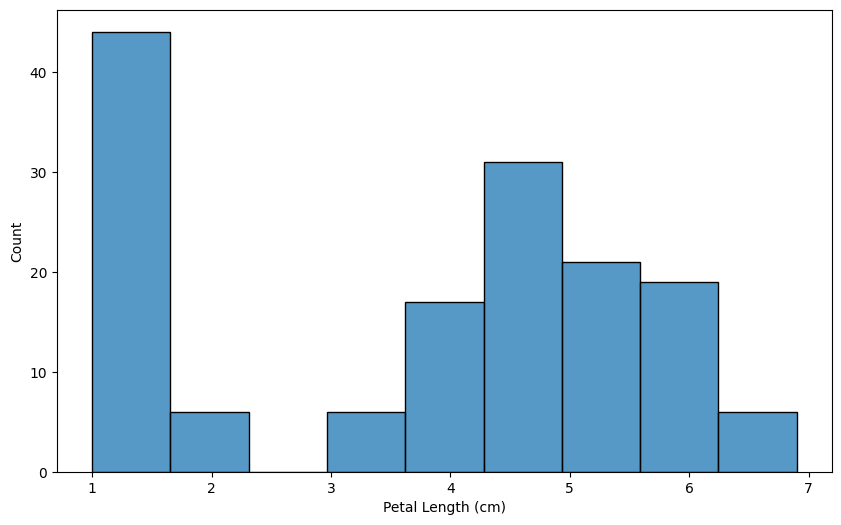

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df_iris['Petal Length (cm)'])

Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

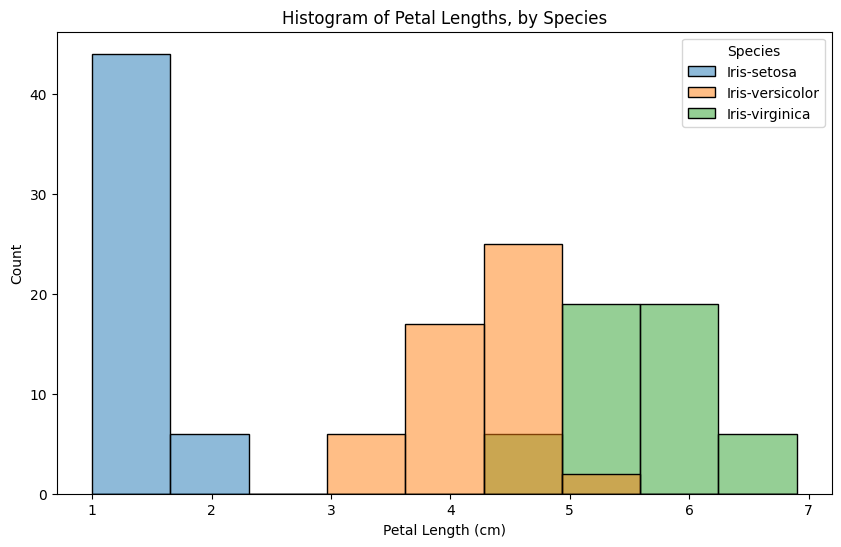

In [29]:
plt.figure(figsize=(10,6))
# Histograms for each species
sns.histplot(data=df_iris, x='Petal Length (cm)', hue='Species')

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Density plots

<Axes: xlabel='Petal Length (cm)', ylabel='Density'>

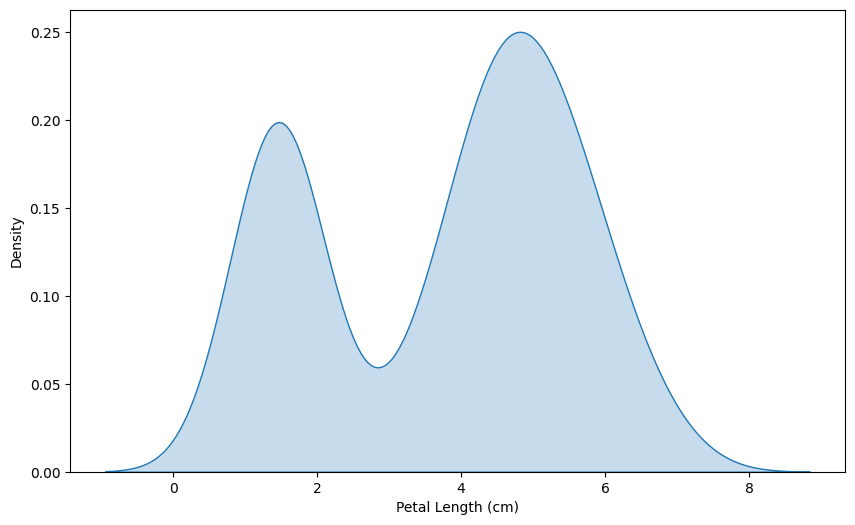

In [28]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_iris['Petal Length (cm)'], fill=True)

<Axes: xlabel='Petal Length (cm)', ylabel='Density'>

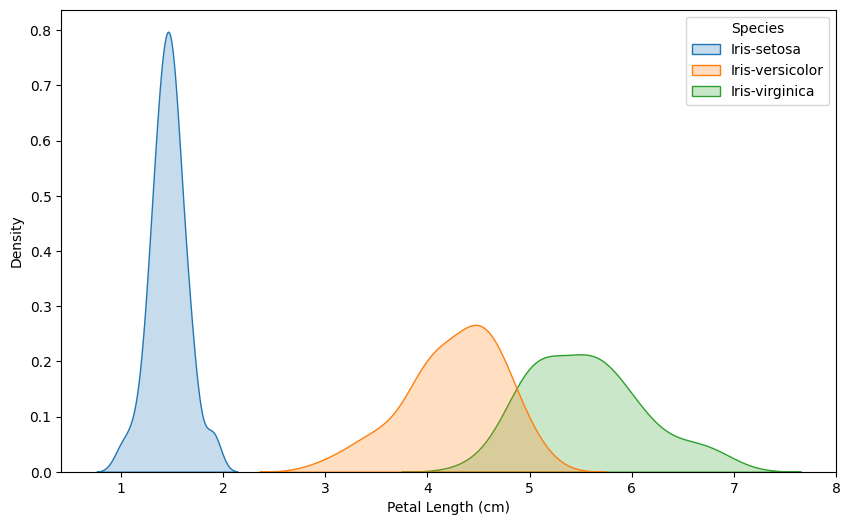

In [32]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_iris, x='Petal Length (cm)', fill=True, hue='Species')

<Figure size 1000x600 with 0 Axes>

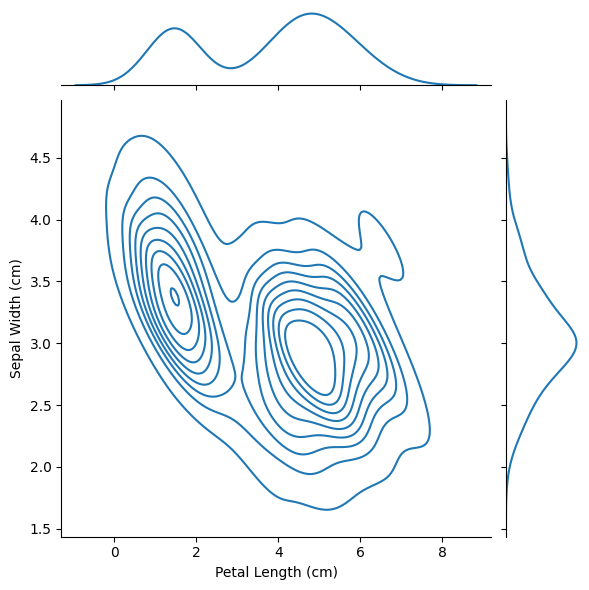

In [37]:
# 2D KDE plot
plt.figure(figsize=(10,6))
sns.jointplot(x=df_iris['Petal Length (cm)'], y=df_iris['Sepal Width (cm)'], kind="kde")

# Sumary
Trends - A trend is defined as a pattern of change.

sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.

Relationship - There are many different chart types that you can use to understand relationships between variables in your data.

sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups.

sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.

sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.

sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.

sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.

sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.

Distribution - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.

sns.histplot - Histograms show the distribution of a single numerical variable.

sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).

sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.